In [1]:
# importing basic labraries for case study

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn 
import seaborn as sns

In [3]:
#reading data for case study

In [4]:
dfMovies = pd.read_csv("movies.dat",sep="::",names=["MovieID","Title","Genres"],engine='python')

In [5]:
dfMovies

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [6]:
dfMovies.shape

(3883, 3)

In [7]:
dfMovies.isnull().sum()

MovieID    0
Title      0
Genres     0
dtype: int64

In [8]:
dfratings=pd.read_csv('ratings.dat',sep="::",names=['UserID','MovieID','Rating','Timestamp'])

<ipython-input-8-24b2b29bb1dc>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  dfratings=pd.read_csv('ratings.dat',sep="::",names=['UserID','MovieID','Rating','Timestamp'])


In [9]:
dfratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [10]:
dfratings.shape

(1000209, 4)

In [11]:
dfratings.isnull().sum()

UserID       0
MovieID      0
Rating       0
Timestamp    0
dtype: int64

In [12]:
dfuser=pd.read_csv('users.dat',sep="::",names=['UserID','Gender','Age','Occupation','Zip-code'])

<ipython-input-12-d01b1ccbd0d8>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  dfuser=pd.read_csv('users.dat',sep="::",names=['UserID','Gender','Age','Occupation','Zip-code'])


In [13]:
dfuser.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [14]:
dfuser.shape

(6040, 5)

In [15]:
dfuser.isnull().sum()

UserID        0
Gender        0
Age           0
Occupation    0
Zip-code      0
dtype: int64

In [16]:
dfMovies.columns

Index(['MovieID', 'Title', 'Genres'], dtype='object')

In [17]:
dfratings.columns

Index(['UserID', 'MovieID', 'Rating', 'Timestamp'], dtype='object')

In [18]:
dfuser.columns

Index(['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code'], dtype='object')

In [19]:
dfuser.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UserID      6040 non-null   int64 
 1   Gender      6040 non-null   object
 2   Age         6040 non-null   int64 
 3   Occupation  6040 non-null   int64 
 4   Zip-code    6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB


In [20]:
# geting master data from all three files
#extraction data information master data 

In [21]:
final_mas=dfMovies.merge(dfratings,how='left',left_on='MovieID',right_on='MovieID')

In [22]:
final_mas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000386 entries, 0 to 1000385
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   MovieID    1000386 non-null  int64  
 1   Title      1000386 non-null  object 
 2   Genres     1000386 non-null  object 
 3   UserID     1000209 non-null  float64
 4   Rating     1000209 non-null  float64
 5   Timestamp  1000209 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 53.4+ MB


In [23]:
master_data=final_mas.merge(dfuser,how='left',left_on='UserID',right_on='UserID')

In [24]:
master_data.drop(labels=['Timestamp','Zip-code'],axis=1,inplace=True)

In [25]:
master_data.head()

,MovieID,Title,Genres,UserID,Rating,Gender,Age,Occupation
0,1,Toy Story (1995),Animation|Children's|Comedy,1.0,5.0,F,1.0,10.0
1,1,Toy Story (1995),Animation|Children's|Comedy,6.0,4.0,F,50.0,9.0
2,1,Toy Story (1995),Animation|Children's|Comedy,8.0,4.0,M,25.0,12.0
3,1,Toy Story (1995),Animation|Children's|Comedy,9.0,5.0,M,25.0,17.0
4,1,Toy Story (1995),Animation|Children's|Comedy,10.0,5.0,F,35.0,1.0


In [26]:
# Age distribution in dataset 
# plot of age distribution 

In [27]:
master_data.Age.value_counts()

25.0    395556
35.0    199003
18.0    183536
45.0     83633
50.0     72490
56.0     38780
1.0      27211
Name: Age, dtype: int64

In [28]:
age_dist=master_data.groupby('Age').size()

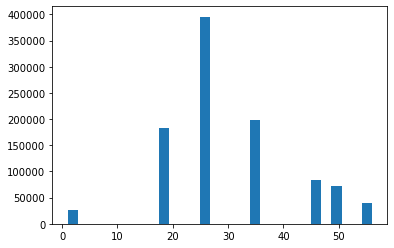

In [29]:
plt.hist(data=age_dist,x=[master_data.Age],bins=30)
plt.show()

### most of the viewers for the movies lies between 20 year to 35 years 

In [30]:
A= master_data.Rating.groupby(master_data.Title=='Toy story (1995)').size()

In [31]:
A

Title
False    1000386
Name: Rating, dtype: int64

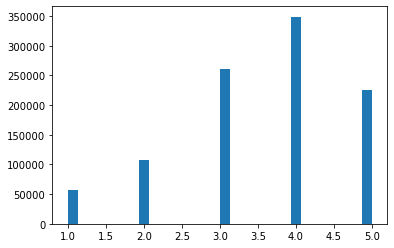

In [32]:
plt.hist(data=A,x=[master_data.Rating],bins=30)
plt.show()

### maximum viewer gives rating to toy story (1995) ,3 to 5 

In [33]:
##top 25 movie by ratings 

In [34]:
A1=master_data.groupby('MovieID').agg({'Rating':'mean'})

In [35]:
A1.sort_values('Rating',ascending=False).head(25)

,Rating
MovieID,
989,5.000000
3881,5.000000
1830,5.000000
3382,5.000000
787,5.000000
3280,5.000000
3607,5.000000
3233,5.000000
3172,5.000000


# part 2
###Find out all the unique genres.

In [36]:
master_data.columns

Index(['MovieID', 'Title', 'Genres', 'UserID', 'Rating', 'Gender', 'Age',
       'Occupation'],
      dtype='object')

In [37]:
C=list(master_data.Genres.str.split('|').values)

In [38]:
uniquegerne= set()
for i in C:
    uniquegerne=uniquegerne.union(set(i))
uniquegerne

{'Action',
 'Adventure',
 'Animation',
 "Children's",
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

In [39]:
uniquegerne1=list(uniquegerne)


In [40]:
# apply label encoding and one-hot encoding on cattegorical data 

In [41]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from numpy import array
#uniquegerne1=array(uniquegerne1)
labelencode= LabelEncoder()
intdata=labelencode.fit_transform(uniquegerne1)
intdata=intdata.reshape(len(intdata),1)

In [42]:
intdata


array([[13],
       [ 6],
       [ 4],
       [ 8],
       [ 2],
       [ 1],
       [10],
       [15],
       [ 5],
       [11],
       [ 0],
       [16],
       [ 7],
       [ 9],
       [17],
       [12],
       [ 3],
       [14]], dtype=int64)

In [43]:
onhot_encode=OneHotEncoder(sparse=False)
onehot=onhot_encode.fit_transform(intdata)
print(onehot)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

### fetures data which most affecting to target(rating )

In [76]:
data=master_data[:500]

In [77]:
data.head()

,MovieID,Title,Genres,UserID,Rating,Gender,Age,Occupation
0,1,Toy Story (1995),Animation|Children's|Comedy,1.0,5.0,F,1.0,10.0
1,1,Toy Story (1995),Animation|Children's|Comedy,6.0,4.0,F,50.0,9.0
2,1,Toy Story (1995),Animation|Children's|Comedy,8.0,4.0,M,25.0,12.0
3,1,Toy Story (1995),Animation|Children's|Comedy,9.0,5.0,M,25.0,17.0
4,1,Toy Story (1995),Animation|Children's|Comedy,10.0,5.0,F,35.0,1.0


In [78]:
feture_col=['MovieID','Age','Occupation']

# model building

In [79]:
x=data[feture_col]

In [80]:
y=data[['Rating']].values

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33)

In [83]:
x_test.shape

(165, 3)

In [84]:
x_train.shape

(335, 3)

In [85]:
y_train.shape

(335, 1)

In [86]:
y_test.shape

(165, 1)

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [88]:
# knn classifire 
# K Nearest Neighbors Classifier

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train,y_train)
Y_pred = knn.predict(x_test)

<ipython-input-88-53bc138d1759>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(x_train,y_train)


In [89]:
#Evaluate the accuracy of  model
from sklearn import metrics
x= metrics.accuracy_score(y_test,Y_pred)
print(x)

0.3151515151515151


In [90]:
#logistic model
logis=LogisticRegression()
logis.fit(x_train,y_train)
y_pred=logis.predict(x_test)

C:\Users\dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [91]:
#Evaluate the accuracy of  model
from sklearn import metrics
x= metrics.accuracy_score(y_test,y_pred)
print(x)

0.3333333333333333


In [95]:
#random forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(x_test)
random_forest.score(x_train,y_train)
acc_random_forest = round(random_forest.score(x_train, y_train) * 100, 2)
acc_random_forest

<ipython-input-95-c4eb584426c4>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(x_train, y_train)


57.31

In [94]:
#Evaluate the accuracy of  model
from sklearn import metrics
x= metrics.accuracy_score(y_test,y_pred)
print(x)

0.3575757575757576
